In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\naman\Downloads\ai_hiring-20210919T104519Z-001\ai_hiring\train.csv",index_col=0)
df.head()

,promptId,uniqueId,essay,evaluator_rating
0,1,1_323,"At present age, our education system is not go...",3.0
1,1,1_238,I am agree the tightly defined curriculum of o...,4.0
2,1,1_212,I strongly agree with the statement that tight...,2.0
3,1,1_117,Our education system is nice quitely but i dis...,2.0
4,1,1_229,i am totally agree with the statement that tig...,3.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1240 entries, 0 to 1239
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   promptId          1240 non-null   int64  
 1   uniqueId          1240 non-null   object 
 2   essay             1240 non-null   object 
 3   evaluator_rating  1240 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 48.4+ KB


In [4]:
df.shape

(1240, 4)

In [5]:
df.isnull().sum()

promptId            0
uniqueId            0
essay               0
evaluator_rating    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,promptId,evaluator_rating
count,1240.000000,1240.000000
mean,2.828226,2.684274
std,1.468642,1.082603
min,1.000000,0.000000
25%,2.000000,2.000000
50%,3.000000,3.000000
75%,5.000000,3.500000
max,5.000000,5.000000


In [8]:
df['promptId'].value_counts()

3    325
5    325
2    317
1    273
Name: promptId, dtype: int64

C:\Users\naman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='promptId', ylabel='evaluator_rating'>

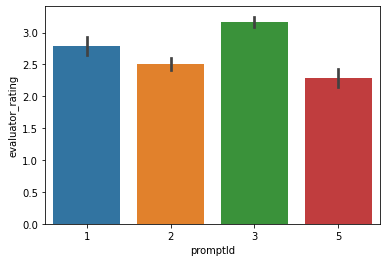

In [9]:
sns.barplot(df['promptId'],df['evaluator_rating'])

In [10]:
df['uniqueId'].unique()

array(['1_323', '1_238', '1_212', ..., '5_421', '5_422', '5_423'],
      dtype=object)

In [11]:
df.groupby(['promptId']).size()

promptId
1    273
2    317
3    325
5    325
dtype: int64

([<matplotlib.patches.Wedge at 0x1857d4d3a30>,
 [Text(0.7477034904430246, 0.8068082116459389, '3'),
  Text(-0.8612542914538999, 0.68428140808606, '5'),
  Text(-0.6352391137529607, -0.8980374537614527, '2'),
  Text(0.8472090428874327, -0.7015959219164265, '1')],
 [Text(0.407838267514377, 0.4400772063523302, '26.21%'),
  Text(-0.4697750680657635, 0.3732444044105781, '26.21%'),
  Text(-0.34649406204706945, -0.4898386111426105, '25.56%'),
  Text(0.462114023393145, -0.38268868468168715, '22.02%')])

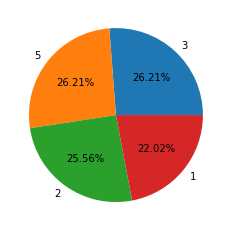

In [12]:
plt.pie(df.promptId.value_counts().values,labels=df.promptId.value_counts().index,autopct="%0.2f%%")

In [13]:
df['essay'][2]

'I strongly agree with the statement that tight schedule of our education system leaves no space for imagination and creativity,as the students now a days are under pressure for compiting with other rather than devloping there own innovative ideas and imagination. In todays world no one focus on what they want in there life, all of us only want how to achieve success in life and how to compete with others. students are pressurised by their parents as well by teachers for hording in the same race.no one motivates their child to do what they want,they say for the things they want from their child to do.This create a greate impact on the minds of young generation that they forget their own dreams and innovative ideas of their aspiring minds.So at last i only want to say that education system should focus of the innovative things done by students and motivating them towards achieving their goals in life.'

In [14]:
import re
import string
def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [15]:
df['essay']=df['essay'].apply(lambda x: clean_text(x))
df.head()

,promptId,uniqueId,essay,evaluator_rating
0,1,1_323,at present age our education system is not goo...,3.0
1,1,1_238,i am agree the tightly defined curriculum of o...,4.0
2,1,1_212,i strongly agree with the statement that tight...,2.0
3,1,1_117,our education system is nice quitely but i dis...,2.0
4,1,1_229,i am totally agree with the statement that tig...,3.0


<AxesSubplot:>

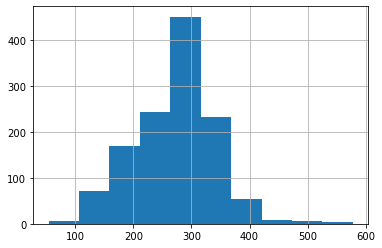

In [16]:
length=df['essay'].str.split().apply(lambda x: len(x))
length.hist()

<AxesSubplot:>

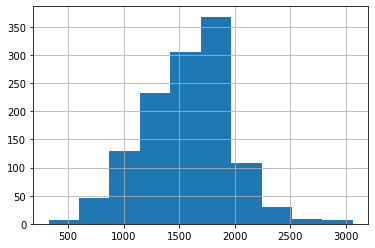

In [17]:
df['essay'].str.len().hist()

In [18]:
import nltk
from nltk.corpus import stopwords
corpus=[]
new= df['essay'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]
from collections import defaultdict
dic=defaultdict(int)
stop=set(stopwords.words('english'))
for word in corpus:
    if word in stop:
        dic[word]+=1

<AxesSubplot:>

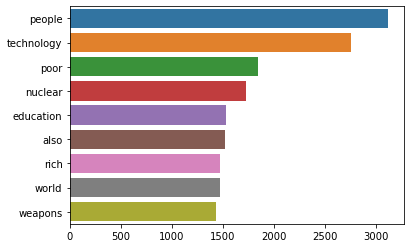

In [19]:
from collections import Counter
counter=Counter(corpus)
most=counter.most_common()
x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

In [20]:
df['essay'][2]

'i strongly agree with the statement that tight schedule of our education system leaves no space for imagination and creativityas the students now a days are under pressure for compiting with other rather than devloping there own innovative ideas and imagination in todays world no one focus on what they want in there life all of us only want how to achieve success in life and how to compete with others students are pressurised by their parents as well by teachers for hording in the same raceno one motivates their child to do what they wantthey say for the things they want from their child to dothis create a greate impact on the minds of young generation that they forget their own dreams and innovative ideas of their aspiring mindsso at last i only want to say that education system should focus of the innovative things done by students and motivating them towards achieving their goals in life'

In [21]:
from nltk.tokenize import RegexpTokenizer
token=RegexpTokenizer(r'\w+')
df['essay']=df['essay'].apply(lambda x: token.tokenize(x))

In [22]:
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
ps=PorterStemmer()
wnl=WordNetLemmatizer()
def text_cleaned(text):
    words=[word for word in text if word not in set(stopwords.words('english'))]
#     words=[ps.stem(wd) for wd in words]
    words=[wnl.lemmatize(wd) for wd in words]
    wds= " ".join(words)
    return wds
    

In [23]:
df['essay']=df['essay'].apply(lambda x: text_cleaned(x))

In [24]:
df['essay'][2]

'strongly agree statement tight schedule education system leaf space imagination creativityas student day pressure compiting rather devloping innovative idea imagination today world one focus want life u want achieve success life compete others student pressurised parent well teacher hording raceno one motivates child wantthey say thing want child dothis create greate impact mind young generation forget dream innovative idea aspiring mindsso last want say education system focus innovative thing done student motivating towards achieving goal life'

In [25]:
from gensim.models import Word2Vec
test_df=pd.read_csv(r"C:\Users\naman\Downloads\ai_hiring-20210919T104519Z-001\ai_hiring\test.csv",index_col=0)
test_df

C:\Users\naman\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


,promptId,uniqueId,essay
0,1,1_315,Curriculum has been adopted in many schools. T...
1,1,1_214,"I strongly agree with the statement , The tig..."
2,1,1_196,Imagination and creativity is the most importa...
3,1,1_178,In our eduction system leaves no room for imag...
4,1,1_201,"I will agree at some what extend, because if w..."
...,...,...,...
300,5,5_146,Earth is a creation of God and everything that...
301,5,5_65,production of arms and weapons in this present...
302,5,5_151,Race to become more powerful can destroy the e...
303,5,5_404,In its attempt to harness the power of the ato...


In [26]:
df

,promptId,uniqueId,essay,evaluator_rating
0,1,1_323,present age education system good many thing d...,3.0
1,1,1_238,agree tightly defined curriculum education sys...,4.0
2,1,1_212,strongly agree statement tight schedule educat...,2.0
3,1,1_117,education system nice quitely disagree change ...,2.0
4,1,1_229,totally agree statement tightly defined curric...,3.0
...,...,...,...,...
1235,5,5_419,entire world race producing arm weapon nuclear...,3.0
1236,5,5_420,race development weapon proceeding day daythe ...,2.5
1237,5,5_421,era every second person hope work towards achi...,4.0
1238,5,5_422,introduction since beginning time human kind a...,3.0


In [27]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [28]:
def essay_to_wordlist(essay_v, remove_stopwords):
    essay_v = re.sub("[^a-zA-Z]", " ", essay_v)
    words = essay_v.lower().split()
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
    return (words)

def essay_to_sentences(essay_v, remove_stopwords):
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    raw_sentences = tokenizer.tokenize(essay_v.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(essay_to_wordlist(raw_sentence, remove_stopwords))
    return sentences

def makeFeatureVec(words, model, num_features):
    featureVec = np.zeros((num_features,),dtype="float32")
    num_words = 0.
    index2word_set = set(model.wv.index_to_key)
    for word in words:
        if word in index2word_set:
            num_words += 1
            featureVec = np.add(featureVec,model.wv[word])        
    featureVec = np.divide(featureVec,num_words)
    return featureVec

def getAvgFeatureVecs(essays, model, num_features):
    counter = 0
    essayFeatureVecs = np.zeros((len(essays),num_features),dtype="float32")
    for essay in essays:
        essayFeatureVecs[counter] = makeFeatureVec(essay, model, num_features)
        counter = counter + 1
    return essayFeatureVecs

In [29]:
from keras.layers import Embedding, LSTM, Dense, Dropout, Lambda, Flatten
from keras.models import Sequential, load_model, model_from_config
import keras.backend as K

In [30]:
lstm=Sequential()
lstm.add(LSTM(300, dropout=0.4, recurrent_dropout=0.4, input_shape=[1, 300], return_sequences=True))
lstm.add(LSTM(64, recurrent_dropout=0.4))
lstm.add(Dropout(0.5))
lstm.add(Dense(1, activation='relu'))
lstm.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 300)            721200    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                93440     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 814,705
Trainable params: 814,705
Non-trainable params: 0
_________________________________________________________________


In [31]:
from sklearn.metrics import cohen_kappa_score

In [49]:
from sklearn.model_selection import KFold
cv=KFold(len(X),shuffle=True)
pred=[]
count=1
for train,test in cv.split(df):
    X_val, X_train, y_val, y_train = X.iloc[test], X.iloc[train], y.iloc[test], y.iloc[train]
    test_essays=test_df['essay']
    test_data_id=test_df['promptId']
    test_data_unique=test_df['uniqueId']
    
    train_essays = X_train['essay']
    val_essays = X_val['essay']
    sentences = []
    
    for essay in train_essays:
            sentences += essay_to_sentences(essay, remove_stopwords = True)
            
    num_features = 300 
    min_word_count = 40
    num_workers = 4
    context = 10
    downsampling = 1e-3

    print("Training Word2Vec Model...")
    model = Word2Vec(sentences, workers=num_workers, vector_size=num_features, min_count = min_word_count, window = context, sample = downsampling)

    model.wv.save_word2vec_format('word2vecmodel.bin', binary=True)
    
    clean_train_essays=[]
    for essay_v in train_essays:
        clean_train_essays.append(essay_to_wordlist(essay_v, remove_stopwords=True))
    trainVec = getAvgFeatureVecs(clean_train_essays, model, num_features)
    
    clean_test_essays = []
    for essay_v in test_essays:
        clean_test_essays.append(essay_to_wordlist( essay_v, remove_stopwords=True ))
    testVec = getAvgFeatureVecs( clean_test_essays, model, num_features )

    clean_val_essays = []
    for essay_v in val_essays:
        clean_val_essays.append(essay_to_wordlist( essay_v, remove_stopwords=True ))
    valVec = getAvgFeatureVecs( clean_val_essays, model, num_features )
    
    trainVec = np.array(trainVec)
    testVec = np.array(testVec)
    valVec = np.array(valVec)
    
    trainVec = np.reshape(trainVec, (trainVec.shape[0], 1, trainVec.shape[1]))
    testVec = np.reshape(testVec, (testVec.shape[0], 1, testVec.shape[1]))
    valVec = np.reshape(valVec, (valVec.shape[0], 1, valVec.shape[1]))
    
    Lstm=lstm.fit(trainVec, y_train,validation_data=(valVec,y_val), batch_size=64, epochs=200)
    
    y_pred_val = lstm.predict(testVec)
    if count == 5:
        y_pred = lstm.predict(testVec)
        y_pred = np.around(y_pred)
        lstm.save('./model_weights/final_lstm.h5')
        break
    y_pred_val = np.around(y_pred_val)
    count+=1

Training Word2Vec Model...
Epoch 1/200
20/20 [==============================] - 0s 12ms/step - loss: 1.0258 - mae: 0.7284 - val_loss: 1.0165 - val_mae: 1.0082
Epoch 2/200
20/20 [==============================] - 0s 11ms/step - loss: 0.8789 - mae: 0.6981 - val_loss: 1.2338 - val_mae: 1.1108
Epoch 3/200
20/20 [==============================] - 0s 12ms/step - loss: 0.8741 - mae: 0.6780 - val_loss: 1.3036 - val_mae: 1.1418
Epoch 4/200
20/20 [==============================] - 0s 13ms/step - loss: 0.8106 - mae: 0.6557 - val_loss: 1.3956 - val_mae: 1.1814
Epoch 5/200
20/20 [==============================] - 0s 13ms/step - loss: 0.8131 - mae: 0.6529 - val_loss: 1.2913 - val_mae: 1.1363
Epoch 6/200
20/20 [==============================] - 0s 13ms/step - loss: 0.7889 - mae: 0.6420 - val_loss: 1.1250 - val_mae: 1.0607
Epoch 7/200
20/20 [==============================] - 0s 11ms/step - loss: 0.7829 - mae: 0.6386 - val_loss: 1.0512 - val_mae: 1.0253
Epoch 8/200
20/20 [==============================

20/20 [==============================] - 0s 18ms/step - loss: 0.7069 - mae: 0.6024 - val_loss: 1.2574 - val_mae: 1.1213
Epoch 124/200
20/20 [==============================] - 0s 19ms/step - loss: 0.7049 - mae: 0.6109 - val_loss: 1.0444 - val_mae: 1.0220
Epoch 125/200
20/20 [==============================] - 0s 16ms/step - loss: 0.7545 - mae: 0.6248 - val_loss: 1.1083 - val_mae: 1.0527
Epoch 126/200
20/20 [==============================] - 0s 16ms/step - loss: 0.6960 - mae: 0.6081 - val_loss: 0.8950 - val_mae: 0.9461
Epoch 127/200
20/20 [==============================] - 0s 17ms/step - loss: 0.6828 - mae: 0.6021 - val_loss: 1.0387 - val_mae: 1.0191
Epoch 128/200
20/20 [==============================] - 0s 13ms/step - loss: 0.7391 - mae: 0.6159 - val_loss: 1.0755 - val_mae: 1.0371
Epoch 129/200
20/20 [==============================] - 0s 12ms/step - loss: 0.7090 - mae: 0.6045 - val_loss: 1.0272 - val_mae: 1.0135
Epoch 130/200
20/20 [==============================] - 0s 19ms/step - loss: 

20/20 [==============================] - 0s 12ms/step - loss: 0.7760 - mae: 0.6395 - val_loss: 0.1540 - val_mae: 0.3924
Epoch 46/200
20/20 [==============================] - 0s 15ms/step - loss: 0.7350 - mae: 0.6217 - val_loss: 0.2479 - val_mae: 0.4979
Epoch 47/200
20/20 [==============================] - 0s 13ms/step - loss: 0.7716 - mae: 0.6347 - val_loss: 0.1253 - val_mae: 0.3539
Epoch 48/200
20/20 [==============================] - 0s 13ms/step - loss: 0.7929 - mae: 0.6414 - val_loss: 0.0578 - val_mae: 0.2403
Epoch 49/200
20/20 [==============================] - 0s 15ms/step - loss: 0.7670 - mae: 0.6293 - val_loss: 0.1065 - val_mae: 0.3263
Epoch 50/200
20/20 [==============================] - 0s 12ms/step - loss: 0.7392 - mae: 0.6248 - val_loss: 0.1533 - val_mae: 0.3915
Epoch 51/200
20/20 [==============================] - 0s 14ms/step - loss: 0.7675 - mae: 0.6434 - val_loss: 0.1420 - val_mae: 0.3769
Epoch 52/200
20/20 [==============================] - 0s 21ms/step - loss: 0.7759 

20/20 [==============================] - 0s 14ms/step - loss: 0.7410 - mae: 0.6188 - val_loss: 0.1218 - val_mae: 0.3490
Epoch 168/200
20/20 [==============================] - 0s 13ms/step - loss: 0.6826 - mae: 0.5922 - val_loss: 0.0989 - val_mae: 0.3146
Epoch 169/200
20/20 [==============================] - 0s 13ms/step - loss: 0.7527 - mae: 0.6285 - val_loss: 0.1289 - val_mae: 0.3591
Epoch 170/200
20/20 [==============================] - 0s 13ms/step - loss: 0.7102 - mae: 0.6089 - val_loss: 0.1308 - val_mae: 0.3616
Epoch 171/200
20/20 [==============================] - 0s 13ms/step - loss: 0.7173 - mae: 0.6136 - val_loss: 0.2250 - val_mae: 0.4743
Epoch 172/200
20/20 [==============================] - 0s 12ms/step - loss: 0.6875 - mae: 0.5949 - val_loss: 0.1024 - val_mae: 0.3199
Epoch 173/200
20/20 [==============================] - 0s 14ms/step - loss: 0.7398 - mae: 0.6209 - val_loss: 0.1376 - val_mae: 0.3709
Epoch 174/200
20/20 [==============================] - 0s 13ms/step - loss: 

Epoch 90/200
20/20 [==============================] - 0s 15ms/step - loss: 0.7761 - mae: 0.6382 - val_loss: 0.1050 - val_mae: 0.3240
Epoch 91/200
20/20 [==============================] - 0s 13ms/step - loss: 0.7560 - mae: 0.6340 - val_loss: 0.1181 - val_mae: 0.3436
Epoch 92/200
20/20 [==============================] - 0s 12ms/step - loss: 0.7581 - mae: 0.6341 - val_loss: 0.1213 - val_mae: 0.3483
Epoch 93/200
20/20 [==============================] - 0s 12ms/step - loss: 0.7564 - mae: 0.6308 - val_loss: 0.1067 - val_mae: 0.3267
Epoch 94/200
20/20 [==============================] - 0s 12ms/step - loss: 0.7622 - mae: 0.6351 - val_loss: 0.1357 - val_mae: 0.3684
Epoch 95/200
20/20 [==============================] - 0s 14ms/step - loss: 0.7656 - mae: 0.6337 - val_loss: 0.1235 - val_mae: 0.3514
Epoch 96/200
20/20 [==============================] - 0s 15ms/step - loss: 0.7276 - mae: 0.6229 - val_loss: 0.1197 - val_mae: 0.3459
Epoch 97/200
20/20 [==============================] - 0s 19ms/step - 

20/20 [==============================] - 0s 14ms/step - loss: 0.7979 - mae: 0.6482 - val_loss: 1.7172 - val_mae: 1.3104
Epoch 13/200
20/20 [==============================] - 0s 13ms/step - loss: 0.8371 - mae: 0.6651 - val_loss: 1.7193 - val_mae: 1.3112
Epoch 14/200
20/20 [==============================] - 0s 12ms/step - loss: 0.7984 - mae: 0.6479 - val_loss: 1.9756 - val_mae: 1.4056
Epoch 15/200
20/20 [==============================] - 0s 12ms/step - loss: 0.8402 - mae: 0.6693 - val_loss: 1.7055 - val_mae: 1.3060
Epoch 16/200
20/20 [==============================] - 0s 13ms/step - loss: 0.8059 - mae: 0.6533 - val_loss: 1.6552 - val_mae: 1.2865
Epoch 17/200
20/20 [==============================] - 0s 12ms/step - loss: 0.7936 - mae: 0.6525 - val_loss: 1.5727 - val_mae: 1.2541
Epoch 18/200
20/20 [==============================] - 0s 12ms/step - loss: 0.8212 - mae: 0.6572 - val_loss: 1.4740 - val_mae: 1.2141
Epoch 19/200
20/20 [==============================] - 0s 13ms/step - loss: 0.7915 

Epoch 74/200
20/20 [==============================] - 0s 11ms/step - loss: 0.7154 - mae: 0.6118 - val_loss: 1.4753 - val_mae: 1.2146
Epoch 75/200
20/20 [==============================] - 0s 10ms/step - loss: 0.7485 - mae: 0.6263 - val_loss: 2.3363 - val_mae: 1.5285
Epoch 76/200
20/20 [==============================] - 0s 11ms/step - loss: 0.7273 - mae: 0.6252 - val_loss: 2.0355 - val_mae: 1.4267
Epoch 77/200
20/20 [==============================] - 0s 11ms/step - loss: 0.7611 - mae: 0.6260 - val_loss: 1.5306 - val_mae: 1.2372
Epoch 78/200
20/20 [==============================] - 0s 12ms/step - loss: 0.7041 - mae: 0.6077 - val_loss: 1.6022 - val_mae: 1.2658
Epoch 79/200
20/20 [==============================] - 0s 12ms/step - loss: 0.7217 - mae: 0.6142 - val_loss: 1.7185 - val_mae: 1.3109
Epoch 80/200
20/20 [==============================] - 0s 12ms/step - loss: 0.7331 - mae: 0.6172 - val_loss: 1.5022 - val_mae: 1.2256
Epoch 81/200
20/20 [==============================] - 0s 12ms/step - 

20/20 [==============================] - 0s 17ms/step - loss: 0.6762 - mae: 0.5928 - val_loss: 1.0166 - val_mae: 1.0083
Epoch 197/200
20/20 [==============================] - 0s 14ms/step - loss: 0.6609 - mae: 0.5877 - val_loss: 0.9362 - val_mae: 0.9676
Epoch 198/200
20/20 [==============================] - 0s 16ms/step - loss: 0.7160 - mae: 0.6079 - val_loss: 1.2681 - val_mae: 1.1261
Epoch 199/200
20/20 [==============================] - 0s 12ms/step - loss: 0.6876 - mae: 0.6037 - val_loss: 1.2736 - val_mae: 1.1286
Epoch 200/200
20/20 [==============================] - 0s 12ms/step - loss: 0.7274 - mae: 0.6052 - val_loss: 1.1147 - val_mae: 1.0558
Training Word2Vec Model...
Epoch 1/200
20/20 [==============================] - 0s 16ms/step - loss: 0.9064 - mae: 0.7074 - val_loss: 0.1162 - val_mae: 0.3409
Epoch 2/200
20/20 [==============================] - 0s 14ms/step - loss: 0.8163 - mae: 0.6502 - val_loss: 0.0762 - val_mae: 0.2761
Epoch 3/200
20/20 [==============================] - 

Epoch 57/200
20/20 [==============================] - 0s 14ms/step - loss: 0.6966 - mae: 0.6072 - val_loss: 0.0045 - val_mae: 0.0672
Epoch 58/200
20/20 [==============================] - 0s 14ms/step - loss: 0.6955 - mae: 0.5968 - val_loss: 0.0052 - val_mae: 0.0722
Epoch 59/200
20/20 [==============================] - 0s 13ms/step - loss: 0.6569 - mae: 0.5857 - val_loss: 0.0133 - val_mae: 0.1154
Epoch 60/200
20/20 [==============================] - 0s 15ms/step - loss: 0.6852 - mae: 0.5958 - val_loss: 0.0041 - val_mae: 0.0638
Epoch 61/200
20/20 [==============================] - 0s 14ms/step - loss: 0.6891 - mae: 0.5976 - val_loss: 0.0021 - val_mae: 0.0454
Epoch 62/200
20/20 [==============================] - 0s 18ms/step - loss: 0.6928 - mae: 0.5962 - val_loss: 0.0111 - val_mae: 0.1052
Epoch 63/200
20/20 [==============================] - 0s 16ms/step - loss: 0.7185 - mae: 0.6003 - val_loss: 1.8436e-06 - val_mae: 0.0014
Epoch 64/200
20/20 [==============================] - 0s 16ms/ste

20/20 [==============================] - 0s 11ms/step - loss: 0.6736 - mae: 0.5953 - val_loss: 0.0097 - val_mae: 0.0986
Epoch 179/200
20/20 [==============================] - 0s 11ms/step - loss: 0.6756 - mae: 0.5967 - val_loss: 0.0065 - val_mae: 0.0808
Epoch 180/200
20/20 [==============================] - 0s 12ms/step - loss: 0.6702 - mae: 0.5895 - val_loss: 7.2586e-04 - val_mae: 0.0269
Epoch 181/200
20/20 [==============================] - 0s 18ms/step - loss: 0.6681 - mae: 0.5902 - val_loss: 3.7873e-04 - val_mae: 0.0195
Epoch 182/200
20/20 [==============================] - 0s 12ms/step - loss: 0.6563 - mae: 0.5811 - val_loss: 0.0036 - val_mae: 0.0601
Epoch 183/200
20/20 [==============================] - 0s 11ms/step - loss: 0.6801 - mae: 0.5867 - val_loss: 0.0020 - val_mae: 0.0452
Epoch 184/200
20/20 [==============================] - 0s 14ms/step - loss: 0.6681 - mae: 0.5928 - val_loss: 0.0091 - val_mae: 0.0953
Epoch 185/200
20/20 [==============================] - 0s 15ms/step 

In [74]:
y_pred=np.array(y_pred)

In [75]:
# data=pd.DataFrame((zip(test_data_id,test_data_unique,test_essays, y_pred)),columns=['promptId','uniqueId','essay','predicted_score'])
test_values=len(testVec)
pred_list=[]
for i in range(test_values):
    pred_list.append(float(y_pred[i]))
pred_list

[3.0,
 2.0,
 3.0,
 3.0,
 3.0,
 0.0,
 3.0,
 3.0,
 2.0,
 2.0,
 3.0,
 0.0,
 3.0,
 2.0,
 3.0,
 3.0,
 2.0,
 3.0,
 3.0,
 2.0,
 3.0,
 3.0,
 2.0,
 4.0,
 2.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 4.0,
 4.0,
 2.0,
 3.0,
 3.0,
 2.0,
 3.0,
 2.0,
 3.0,
 4.0,
 3.0,
 3.0,
 3.0,
 3.0,
 4.0,
 3.0,
 3.0,
 3.0,
 2.0,
 2.0,
 3.0,
 2.0,
 3.0,
 2.0,
 2.0,
 2.0,
 3.0,
 3.0,
 2.0,
 3.0,
 2.0,
 1.0,
 2.0,
 2.0,
 3.0,
 3.0,
 2.0,
 2.0,
 4.0,
 3.0,
 3.0,
 2.0,
 3.0,
 3.0,
 3.0,
 2.0,
 3.0,
 3.0,
 3.0,
 3.0,
 2.0,
 1.0,
 2.0,
 3.0,
 3.0,
 2.0,
 3.0,
 3.0,
 2.0,
 2.0,
 3.0,
 3.0,
 2.0,
 3.0,
 2.0,
 3.0,
 3.0,
 3.0,
 3.0,
 2.0,
 2.0,
 2.0,
 3.0,
 0.0,
 3.0,
 3.0,
 2.0,
 3.0,
 3.0,
 3.0,
 3.0,
 2.0,
 3.0,
 3.0,
 2.0,
 3.0,
 2.0,
 3.0,
 2.0,
 3.0,
 2.0,
 3.0,
 3.0,
 3.0,
 2.0,
 2.0,
 2.0,
 2.0,
 3.0,
 3.0,
 3.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 0.0,
 3.0,
 2.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 4.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0

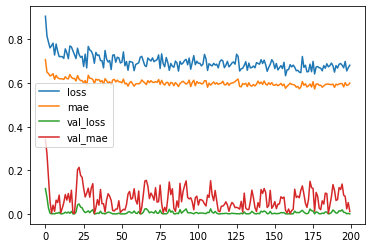

In [51]:
d1=pd.DataFrame(Lstm.history).plot()

In [84]:
df_final=pd.read_csv(r"C:\Users\naman\Downloads\ai_hiring-20210919T104519Z-001\ai_hiring\test.csv",index_col=0)
df_final["predicted_score"]=pred_list
df_final

,promptId,uniqueId,essay,predicted_score
0,1,1_315,Curriculum has been adopted in many schools. T...,3.0
1,1,1_214,"I strongly agree with the statement , The tig...",2.0
2,1,1_196,Imagination and creativity is the most importa...,3.0
3,1,1_178,In our eduction system leaves no room for imag...,3.0
4,1,1_201,"I will agree at some what extend, because if w...",3.0
...,...,...,...,...
300,5,5_146,Earth is a creation of God and everything that...,3.0
301,5,5_65,production of arms and weapons in this present...,2.0
302,5,5_151,Race to become more powerful can destroy the e...,3.0
303,5,5_404,In its attempt to harness the power of the ato...,3.0


In [92]:
df_final.to_csv('test_prediction.csv')